# SimiC Pipeline - Visualization Tutorial

>*Author: Irene Marín-Goñi, PhD student - ML4BM group (CIMA University of Navarra)*

This notebook provides a comprehensive guide to visualizing SimiC pipeline results with publication-quality figures.

## Overview

This tutorial covers:
1. Creating a visualization object from your results
2. Customizing labels for better readability
3. Weight distribution visualizations
4. AUC score distributions and comparisons
5. Dissimilarity heatmaps
6. UMAP integration with TF activity scores
7. Network-specific visualizations

For pipeline execution, see `Tutorial_SimiCPipeline_full.ipynb`
For preprocessing steps, see `Tutorial_SimiCPipeline_preprocessing.ipynb`


## Setup

Required packages:
- simicpipeline
- anndata (for UMAP visualizations)
- scanpy (for advanced plotting)
- matplotlib
- pandas
- numpy

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Change to your working directory
os.chdir("/mnt/md0/imaring/test/")
print(f"Working directory: {os.getcwd()}")

Working directory: /mnt/md0/imaring/test


In [2]:
from simicpipeline import SimiCPipeline, SimiCVisualization
print("✓ SimiC modules imported successfully")

✓ SimiC modules imported successfully


## Step 1: Initialize Visualization Object

Create a visualization instance pointing to your completed pipeline run.

In [3]:
# Initialize visualization object
viz = SimiCVisualization(
    project_dir="./SimiCExampleRun/KPB25L/Tumor",
    run_name="experiment_tumor"
)

print(f"✓ Visualization object created")
print(f"  Project directory: {viz.project_dir}")
print(f"  Run name: {viz.run_name}")
print(f"  Figures will be saved to: {viz.figures_path}")

✓ Visualization object created
  Project directory: SimiCExampleRun/KPB25L/Tumor
  Run name: experiment_tumor
  Figures will be saved to: SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor


## Step 2: Set Up File Paths

Point the visualization to your pipeline results files.

In [4]:
# If you're continuing from a previous run, set the paths
viz.set_input_paths(
    p2df=viz.project_dir / "inputFiles/expression_matrix.pickle",
    p2assignment=viz.project_dir / "inputFiles/treatment_annotation.txt",
    p2tf=viz.project_dir / "inputFiles/TF_list.pickle"
)

# Set output paths to match your pipeline results
viz.set_parameters(
    lambda1=1e-1,
    lambda2=1e-2
)

print("✓ Paths configured for visualization")

✓ Paths configured for visualization


## Step 3: Customize Label Names

Set human-readable names for your phenotype labels to improve figure clarity.

In [5]:
# Set custom label names for better visualization
viz.set_label_names({
    0: 'Control',
    1: 'PD-L1',
    2: 'DAC',
    3: 'Combination'
})

print(f"✓ Label names configured: {viz.label_names}")

Label names set: {0: 'Control', 1: 'PD-L1', 2: 'DAC', 3: 'Combination'}
✓ Label names configured: {0: 'Control', 1: 'PD-L1', 2: 'DAC', 3: 'Combination'}


## Step 4: Weight Distribution Visualizations

### R² Distribution Plots

Visualize the quality of regression fits across phenotypes.


PLOTTING R² DISTRIBUTIONS



✓ Saved to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/R2_distribution.pdf
✓ R² distribution plots created


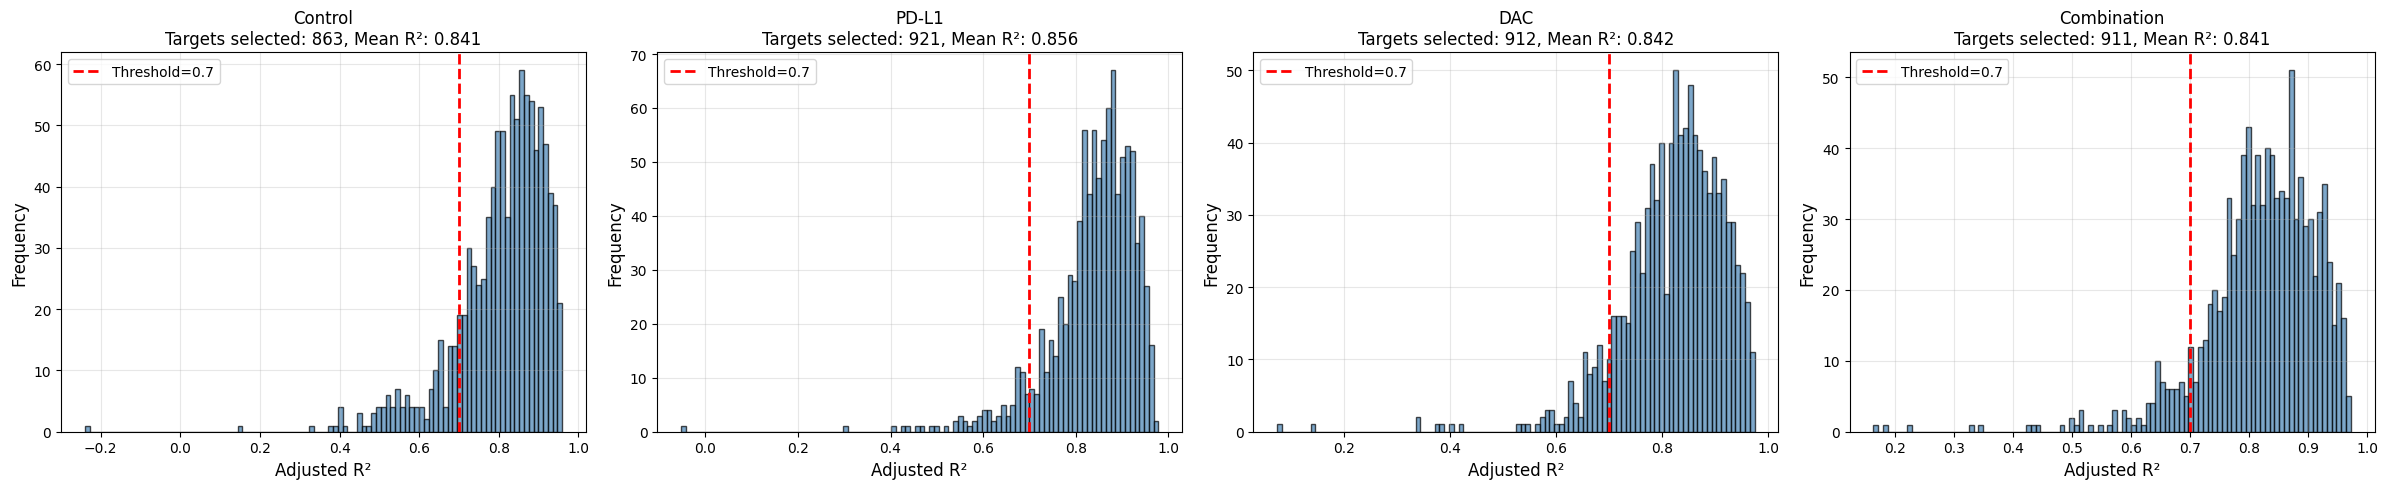

In [6]:
# Plot R² distributions
fig = viz.plot_r2_distribution(
    threshold=0.7,
    save=True,
    filename="R2_distribution.pdf"
)
print("✓ R² distribution plots created")

### TF Weight Barplots

Visualize regulatory weights for specific transcription factors across target genes.

Top 5 TFs by dissimilarity:
  - Nfat5: 0.7278
  - Glis3: 0.7236
  - Zfpm2: 0.6659
  - Esr1: 0.6086
  - Tcf7l2: 0.6010

PLOTTING TF WEIGHT BARPLOTS

Processing Nfat5...
Processing Glis3...
✓ Saved to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/TF_weights_barplot.pdf
✓ TF weight barplots created


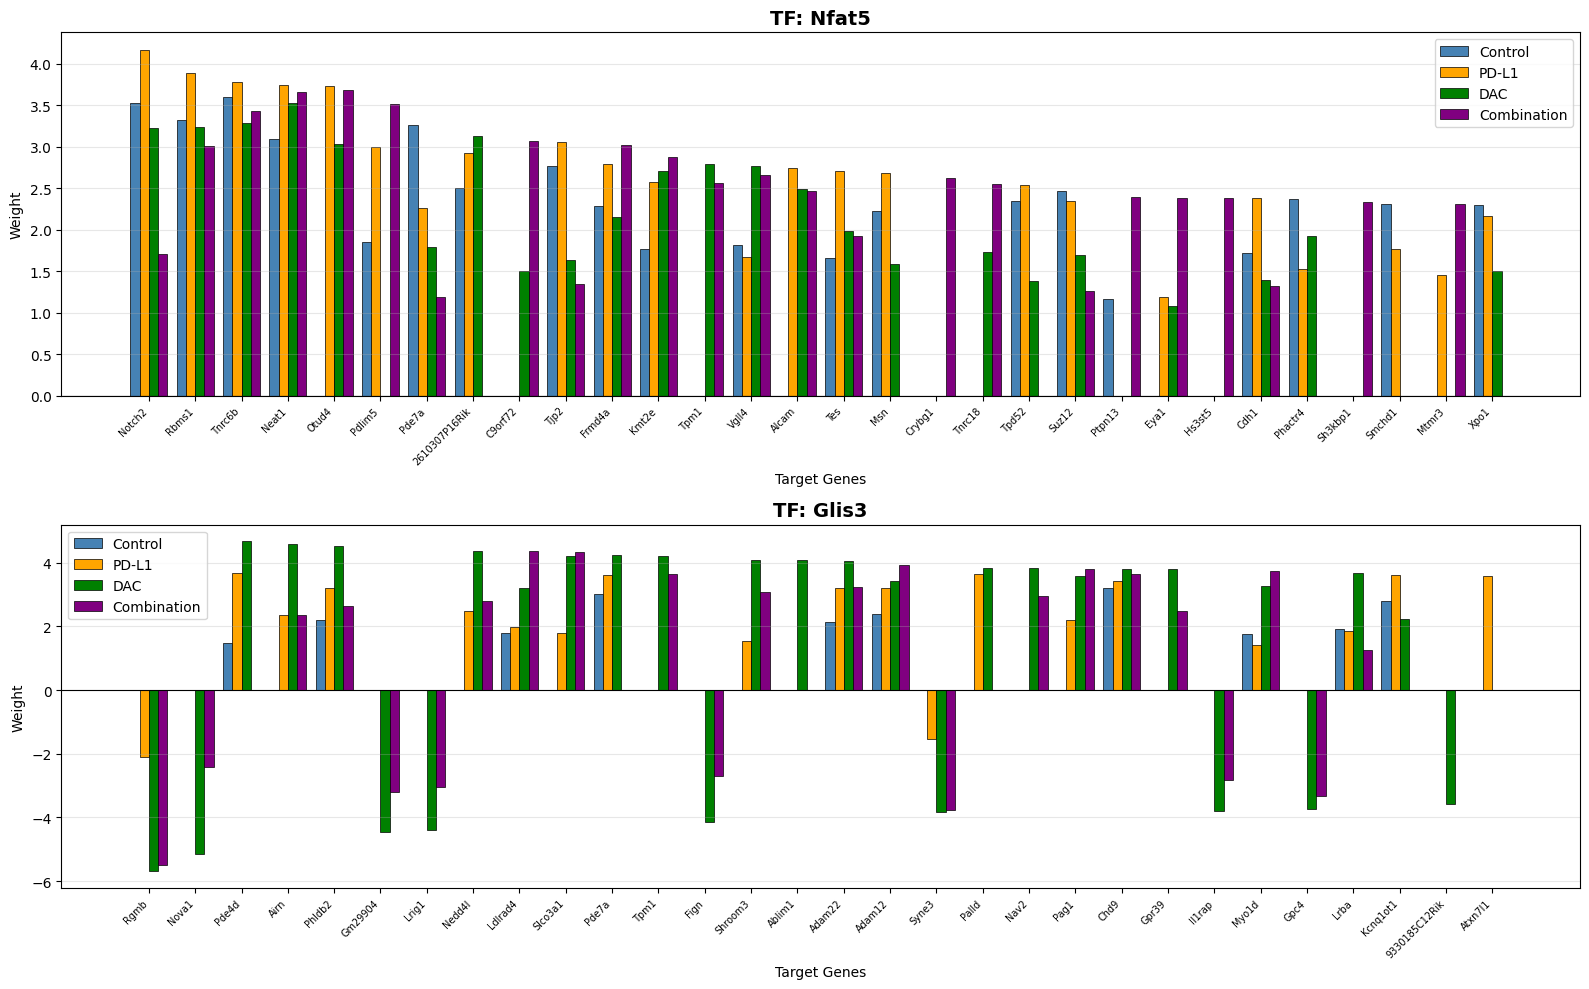

In [7]:
# Get top TFs by dissimilarity score for visualization
MinMax_all = viz.calculate_dissimilarity(verbose=False)
top_tfs = MinMax_all.head(5).index.tolist()

print(f"Top 5 TFs by dissimilarity:")
for tf in top_tfs:
    print(f"  - {tf}: {MinMax_all.loc[tf, 'MinMax_score']:.4f}")

# Plot TF weights for top TFs
fig = viz.plot_tf_weights(
    tf_names=top_tfs[:2],  # Plot first 2 TFs
    top_n_targets=30,
    save=True,
    filename="TF_weights_barplot.pdf"
)
print("✓ TF weight barplots created")

### Target Gene Weight Barplots

Visualize which TFs regulate specific target genes.


PLOTTING TARGET WEIGHT BARPLOTS

Processing Pdgfra...
✓ Saved to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/target_weights_barplot.pdf
✓ Target weight barplots created


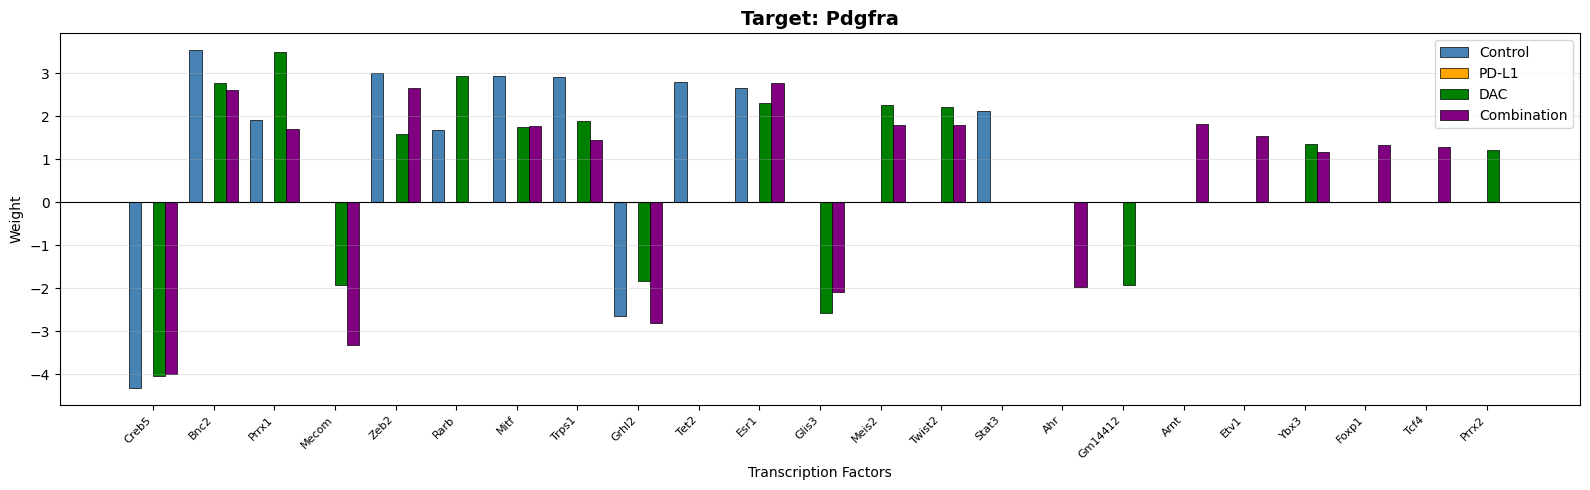

In [8]:
# Example target genes - replace with genes of interest
target_genes = ['Egfr', 'Pdgfra']

# Plot target weights
fig = viz.plot_target_weights(
    target_names=target_genes,
    save=True,
    filename="target_weights_barplot.pdf"
)
print("✓ Target weight barplots created")

## Step 5: AUC Distribution Visualizations

### Basic AUC Distributions

Plot TF activity score distributions with filled density curves.


PLOTTING AUC DISTRIBUTIONS

Comparing labels [0, 1, 2, 3].
Processing Nfat5...
Processing Glis3...
Processing Zfpm2...
Processing Esr1...
✓ Saved to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/AUC_distributions_filled.pdf
✓ Filled AUC distribution plots created


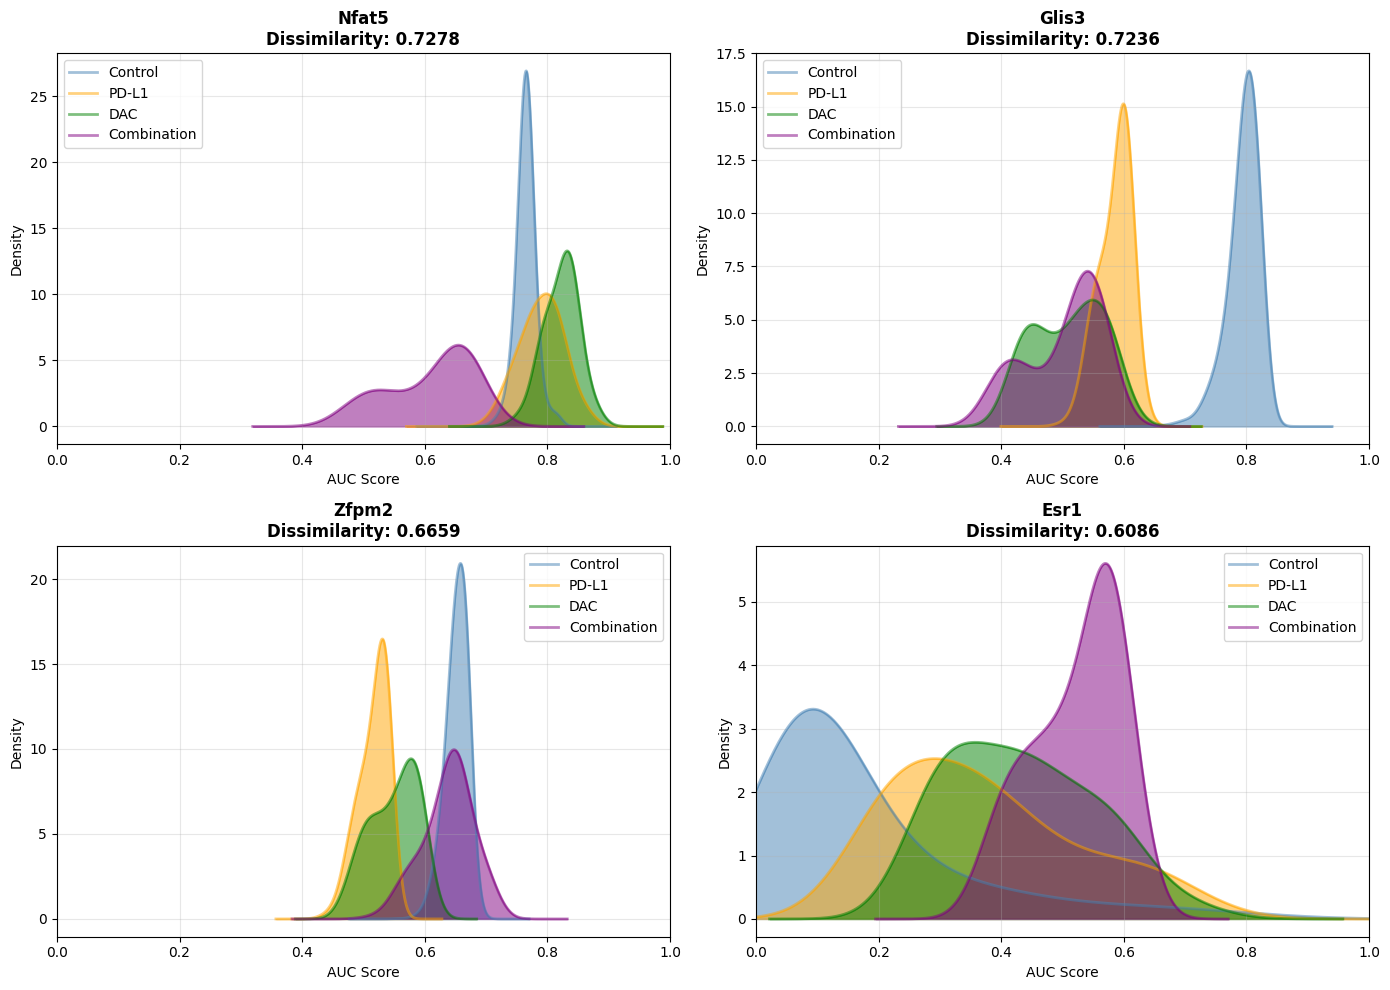

In [9]:
# Plot AUC distributions for top TFs with filled density
fig = viz.plot_auc_distributions(
    tf_names=top_tfs[:4],
    labels=[0, 1, 2, 3],
    fill=True,
    alpha=0.5,
    bw_adjust=0.5,
    save=True,
    filename="AUC_distributions_filled.pdf"
)
print("✓ Filled AUC distribution plots created")

### AUC Distribution Variations

Explore different visualization styles for detailed analysis.


PLOTTING AUC DISTRIBUTIONS

Comparing labels [0, 1, 2, 3].
Processing Nfat5...
Processing Glis3...
✓ Saved to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/AUC_distributions_smooth.pdf
✓ Smooth AUC distribution plots created


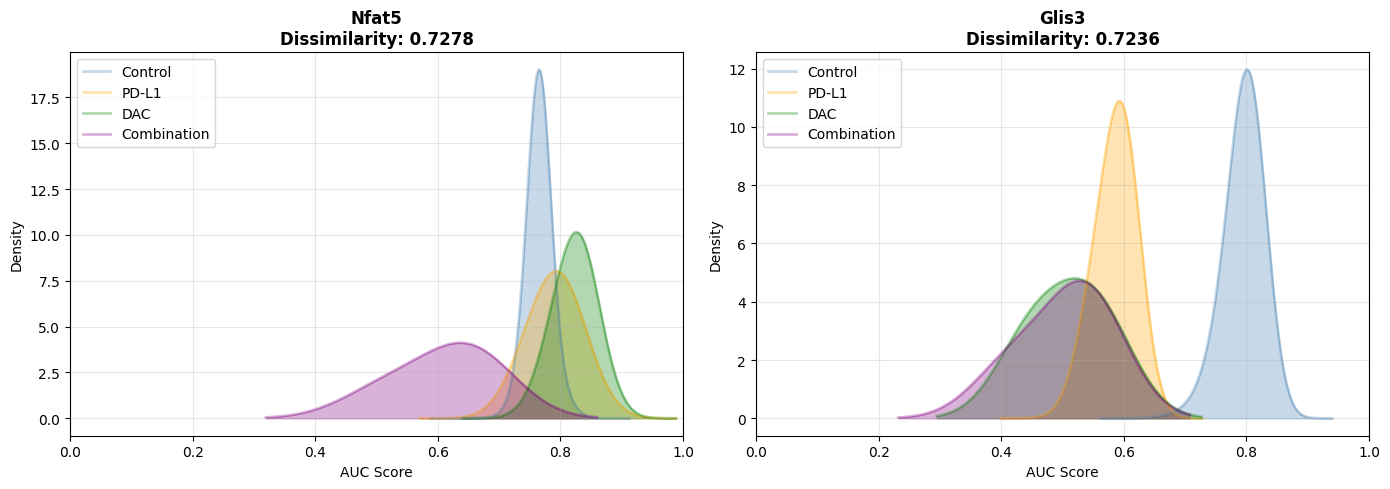

In [10]:
# Smooth, lightly filled density curves
viz.plot_auc_distributions(
    tf_names=top_tfs[0:2],
    labels=[0, 1, 2, 3],
    fill=True,
    alpha=0.3,  # Less intense color
    bw_adjust=1.0,  # Smoother curves
    save=True,
    filename="AUC_distributions_smooth.pdf"
)
print("✓ Smooth AUC distribution plots created")

In [ ]:
# Unfilled line plots showing fine details
viz.plot_auc_distributions(
    tf_names=top_tfs[0:2],
    labels=[0, 3],
    fill=False,  # Line plot only
    bw_adjust=0.3,  # Less smooth - shows detail
    save=True,
    filename="AUC_distributions_detailed.pdf"
)
print("✓ Detailed AUC distribution plots created")

## Step 6: Dissimilarity Heatmap

Visualize regulatory dissimilarity across all TFs.


PLOTTING DISSIMILARITY HEATMAP


CALCULATING DISSIMILARITY SCORES ACROSS LABELS

Comparing labels [0, 1, 2, 3].

Calculating dissimilarity scores...

Top 10 TFs by MinMax dissimilarity score:
  Nfat5: 0.7278
  Glis3: 0.7236
  Zfpm2: 0.6659
  Esr1: 0.6086
  Tcf7l2: 0.6010
  Tcf4: 0.5869
  Zfhx4: 0.5554
  Etv4: 0.5547
  Mitf: 0.5353
  Smad6: 0.5210
✓ Saved to SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor/dissimilarity_heatmap.pdf
✓ Dissimilarity heatmap created


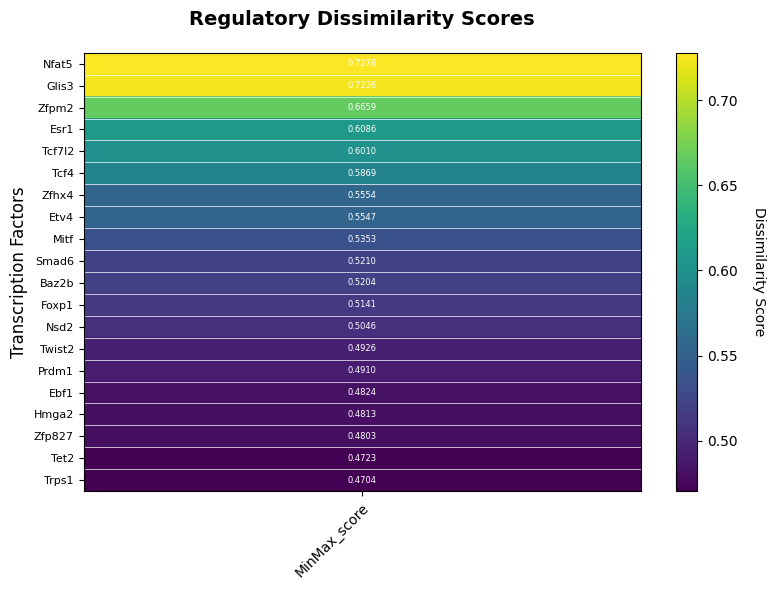

In [11]:
# Plot dissimilarity heatmap for top TFs
fig = viz.plot_dissimilarity_heatmap(
    labels=[0, 1, 2, 3],
    top_n_tfs=20,
    save=True,
    filename="dissimilarity_heatmap.pdf"
)
print("✓ Dissimilarity heatmap created")

## Step 7: Network-Specific Visualizations

### Extract and Visualize TF Networks

In [14]:
# Get network for a specific TF
tf_of_interest = top_tfs[0]
tf_of_interest = "Bnc2"
network = viz.get_TF_network(tf_of_interest, stacked=True)

print(f"\nRegulatory network for {tf_of_interest}:")
print(f"  Total targets: {len(network)}")
print(f"\n  Top 10 targets by absolute weight:")

# Calculate max absolute weight across all phenotypes
network['max_abs_weight'] = network.abs().max(axis=1)
top_targets = network.nlargest(10, 'max_abs_weight')
print(top_targets.drop('max_abs_weight', axis=1))

Retrieving network for TF: Bnc2

Regulatory network for Bnc2:
  Total targets: 668

  Top 10 targets by absolute weight:
                0         1         2         3
Gm29904  8.831773  3.083581  2.077233  1.892829
Gpc4     8.696234  6.343992  3.594137  2.119100
Nkain2   8.287028  0.000000  0.000000  0.000000
Cntn5    7.287531  0.000000  1.300047  0.000000
Nebl     7.245178  1.726249  1.793651  0.000000
Epha7    7.103086  4.491912  2.913800  1.006674
Dpysl3   6.975973  5.348943  1.481359  1.489247
Scn5a    6.942449  3.990604  0.000000  2.092633
Dock1    6.922481  6.348320  0.000000  2.842776
Nrg1     5.259130  6.737916  1.523508  1.387259


### Network Heatmap Visualization

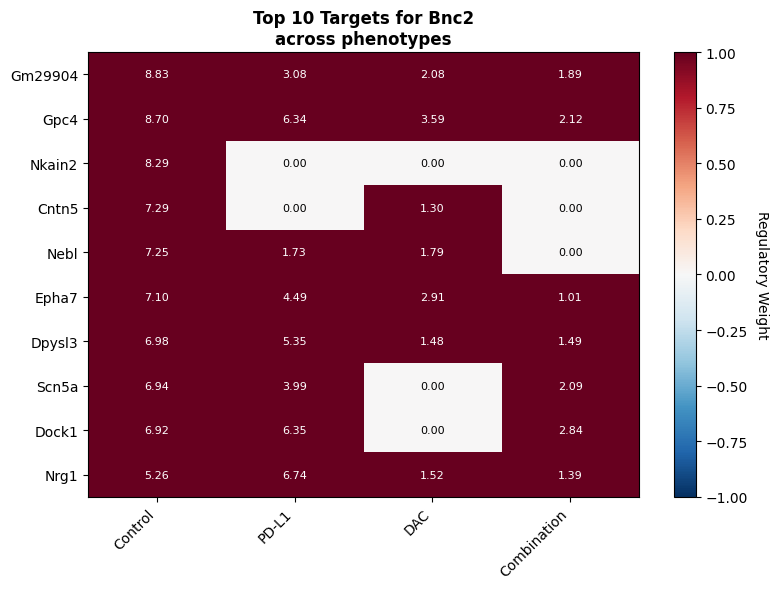

✓ Network visualization for Bnc2 created


In [16]:
# Create heatmap of TF regulatory network
fig, ax = plt.subplots(figsize=(8, 6))

# Drop the max_abs_weight column for plotting
plot_data = top_targets.drop('max_abs_weight', axis=1)

im = ax.imshow(plot_data.values, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)

# Set labels
label_names = ['Control', 'PD-L1', 'DAC', 'Combination']
ax.set_xticks(np.arange(len(plot_data.columns)))
ax.set_yticks(np.arange(len(plot_data.index)))
ax.set_xticklabels(label_names[:len(plot_data.columns)])
ax.set_yticklabels(plot_data.index)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Regulatory Weight', rotation=270, labelpad=15)

ax.set_title(f'Top 10 Targets for {tf_of_interest}\nacross phenotypes',
            fontsize=12, fontweight='bold')

# Add values to cells
for i in range(len(plot_data.index)):
    for j in range(len(plot_data.columns)):
        text = ax.text(j, i, f'{plot_data.values[i, j]:.2f}',
                      ha='center', va='center',
                      color='white' if abs(plot_data.values[i, j]) > 0.5 else 'black',
                      fontsize=8)

plt.tight_layout()
plt.savefig(viz.figures_path / f"network_{tf_of_interest}_heatmap.pdf", dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Network visualization for {tf_of_interest} created")

## Step 8: Summary Statistics Visualization

Create a comprehensive overview of AUC score distributions.

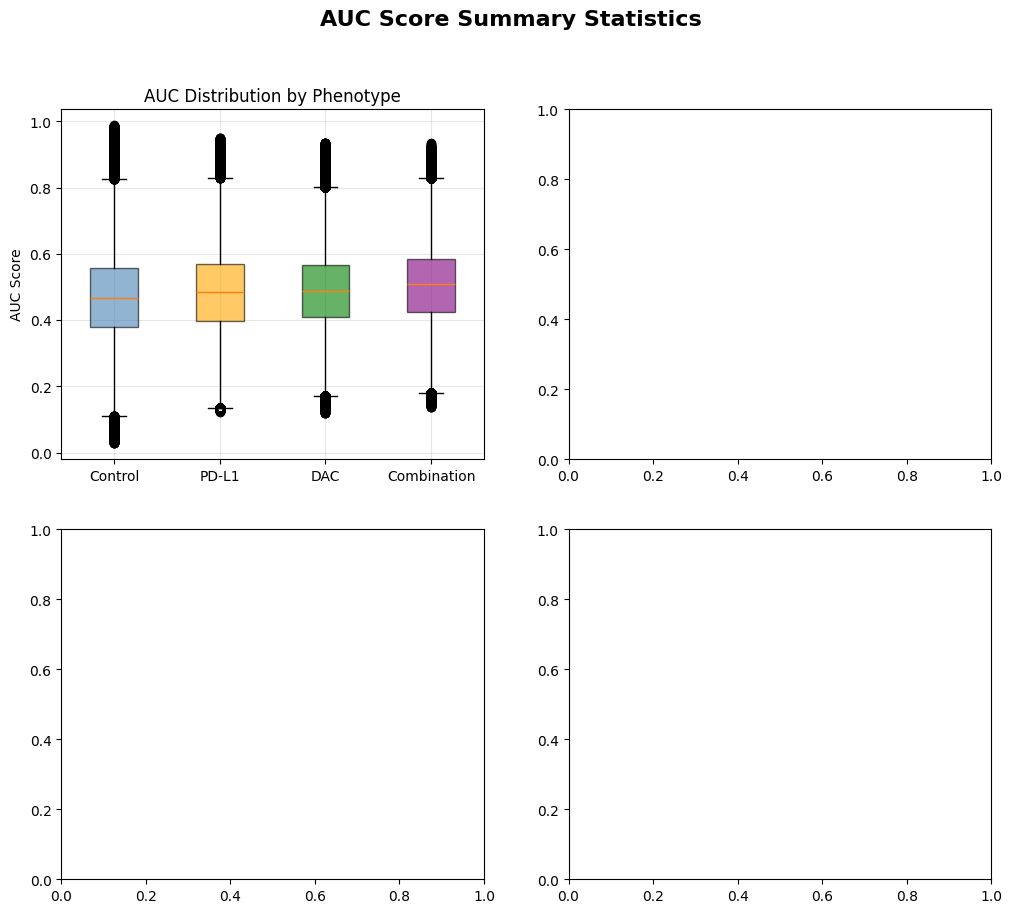

In [17]:
# Get AUC data for all labels
auc_filtered = viz.load_results('auc_filtered')

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('AUC Score Summary Statistics', fontsize=16, fontweight='bold')

colors = ['steelblue', 'orange', 'green', 'purple']
labels = [0, 1, 2, 3]
label_names = ['Control', 'PD-L1', 'DAC', 'Combination']

# 1. Box plot of AUC distributions
ax1 = axes[0, 0]
auc_data_list = []
for label in labels:
    auc_subset = viz.subset_label_specific_auc('auc_filtered', label)
    auc_values = auc_subset.values.flatten()
    auc_values = auc_values[~np.isnan(auc_values)]
    auc_data_list.append(auc_values)

bp = ax1.boxplot(auc_data_list, labels=label_names, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
ax1.set_ylabel('AUC Score', fontsize=10)
ax1.set_title('AUC Distribution by Phenotype', fontsize=12)
ax1.grid(alpha=0.3)

# ...existing visualization code for remaining subplots...

In [18]:
# 2. Histogram of overall AUC distribution
ax2 = axes[0, 1]
for idx, (label, label_name) in enumerate(zip(labels, label_names)):
    ax2.hist(auc_data_list[idx], bins=30, alpha=0.5,
            color=colors[idx], label=label_name, density=True)
ax2.set_xlabel('AUC Score', fontsize=10)
ax2.set_ylabel('Density', fontsize=10)
ax2.set_title('Overall AUC Distribution', fontsize=12)
ax2.legend()
ax2.grid(alpha=0.3)

# 3. Mean AUC per label
ax3 = axes[1, 0]
mean_aucs = [np.mean(data) for data in auc_data_list]
std_aucs = [np.std(data) for data in auc_data_list]
x_pos = np.arange(len(labels))
ax3.bar(x_pos, mean_aucs, yerr=std_aucs, alpha=0.7, color=colors,
       edgecolor='black', capsize=5)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(label_names)
ax3.set_ylabel('Mean AUC Score', fontsize=10)
ax3.set_title('Mean AUC Score by Phenotype', fontsize=12)
ax3.grid(alpha=0.3, axis='y')

# 4. Number of TFs with high activity (AUC > 0.5)
ax4 = axes[1, 1]
high_activity_counts = []
for label in labels:
    auc_subset = viz.subset_label_specific_auc('auc_filtered', label)
    mean_auc_per_tf = auc_subset.mean(axis=0)
    high_activity = (mean_auc_per_tf > 0.5).sum()
    high_activity_counts.append(high_activity)

ax4.bar(x_pos, high_activity_counts, alpha=0.7, color=colors, edgecolor='black')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(label_names)
ax4.set_ylabel('Number of TFs', fontsize=10)
ax4.set_title('TFs with High Activity (AUC > 0.5)', fontsize=12)
ax4.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(viz.figures_path / 'AUC_summary_statistics.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Summary statistics visualization created")

<Figure size 640x480 with 0 Axes>

✓ Summary statistics visualization created


## Step 9: UMAP Integration (Optional)

If you have an AnnData object with UMAP coordinates, visualize TF activity on the embedding.

In [ ]:
# Optional: Load AnnData object with UMAP
import anndata as ad

# Load your AnnData object
# adata = ad.read_h5ad('')

# Pass to visualization object
# viz.set_adata(adata)

# Plot TF activity on UMAP
# fig = viz.plot_umap_with_activity(
#     tf_names=top_tfs[:4],
#     labels=[0, 1, 2, 3],
#     color_map='inferno',
#     size=10,
#     alpha=0.6,
#     ncols=2,
#     save=True
# )

print("Uncomment code above if you have an AnnData object with UMAP coordinates")

## Step 10: Export Results Summary

Generate a summary of all created visualizations.

In [19]:
# List all generated figures
figure_files = sorted(viz.figures_path.glob('*.pdf'))

print("\n" + "="*70)
print("VISUALIZATION SUMMARY")
print("="*70)
print(f"\nGenerated {len(figure_files)} visualization files:")
print(f"\nSaved to: {viz.figures_path}\n")

for i, fig_file in enumerate(figure_files, 1):
    print(f"{i}. {fig_file.name}")

print("\n" + "="*70)


VISUALIZATION SUMMARY

Generated 14 visualization files:

Saved to: SimiCExampleRun/KPB25L/Tumor/outputSimic/figures/experiment_tumor

1. AUC_distributions_filled.pdf
2. AUC_distributions_smooth.pdf
3. AUC_summary_statistics.pdf
4. R2_distribution.pdf
5. TF_weights_barplot.pdf
6. dissimilarity_heatmap.pdf
7. experiment_tumor_AUC_distributions.pdf
8. experiment_tumor_AUC_distributions_light.pdf
9. experiment_tumor_AUC_distributions_unfilled.pdf
10. experiment_tumor_TF_weights.pdf
11. experiment_tumor_target_weights.pdf
12. network_Bnc2_heatmap.pdf
13. network_Nfat5_heatmap.pdf
14. target_weights_barplot.pdf



## Summary

This tutorial covered:

✓ Creating visualization objects from pipeline results
✓ Customizing label names for clarity
✓ Weight distribution visualizations (R², TF weights, target weights)
✓ AUC score distributions with multiple visualization styles
✓ Dissimilarity analysis across phenotypes
✓ TF-specific network visualization
✓ Summary statistics and comprehensive overviews
✓ Optional UMAP integration for spatial context

## Next Steps

1. **Customize visualizations**: Modify colors, styles, and layouts to match your publication requirements
2. **Export figures**: Save high-resolution PDFs suitable for manuscript submission
3. **Deep-dive analysis**: Use pipeline methods to extract data for custom visualizations
4. **Network analysis**: Combine results with network analysis tools for interactive exploration
5. **Biological validation**: Cross-reference predicted regulons with experimental data

## Additional Resources

- Complete pipeline tutorial: `Tutorial_SimiCPipeline_full.ipynb`
- Data preprocessing: `Tutorial_SimiCPipeline_preprocessing.ipynb`
- Simple quick-start: `Tutorial_SimiCPipeline_simple.ipynb`
- API documentation: Check the SimiCPipeline and SimiCVisualization class docstrings
- Original publication: Peng et al., Commun Biol 5, 351 (2022)